In [1]:
from sympy import *

init_session()

IPython console for SymPy 1.6.1 (Python 3.6.10-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [2]:
from fractions import Fraction

qsi = symbols("xi")
eta = symbols("eta")

N1_expr = Fraction(1, 4) * (1 - eta) * (1 - qsi)
N2_expr = Fraction(1, 4) * (1 + eta) * (1 - qsi)
N3_expr = Fraction(1, 4) * (1 + eta) * (1 + qsi)
N4_expr = Fraction(1, 4) * (1 - eta) * (1 + qsi)

N1, N2, N3, N4 = symbols("N_1^{(e)} N_2^{(e)} N_3^{(e)} N_4^{(e)}")

Ne = Matrix([[N1, 0, N2, 0, N3, 0, N4, 0], [0, N1, 0, N2, 0, N3, 0, N4]])
Ne

⎡N_1__{(e)}      0       N_2__{(e)}      0       N_3__{(e)}      0       N_4__
⎢                                                                             
⎣    0       N_1__{(e)}      0       N_2__{(e)}      0       N_3__{(e)}      0

{(e)}      0     ⎤
                 ⎥
       N_4__{(e)}⎦

In [3]:
x, y, l = symbols("x y l")

x1, y1 = symbols("x_1 y_1")

x_qsi = l/2 * qsi + x1 + l*(sqrt(2)/2)
y_eta = l/2 * eta + y1 + l*(sqrt(2)/2)

qsi_x = (2/l) * (x - x1 - l*(sqrt(2)/2))
eta_y = (2/l) * (y - y1 - l*(sqrt(2)/2))

N = dict()
Ns = [0, N1_expr, N2_expr, N3_expr, N4_expr]
for i in (x, y):
    for k in range(1, 4 + 1):
        N[(i, k)] = simplify((diff(Ns[k], qsi) * diff(qsi_x, i) + diff(Ns[k], eta) * diff(eta_y, i)))
N

In [4]:
B_matrix = Matrix([[N[(x, (i//2) + 1)] if i % 2 == 0 else 0 for i in range(8)],
                   [N[(y, (i//2) + 1)] if i % 2 == 1 else 0 for i in range(8)],
                   [N[(y if i % 2 == 0 else x, (i//2) + 1)] for i in range(8)]])

B = MatrixSymbol("B", 3, 8)

B_matrix

⎡η - 1         -(η + 1)              η + 1           1 - η             ⎤
⎢─────    0    ─────────      0      ─────    0      ─────        0    ⎥
⎢ 2⋅l             2⋅l                 2⋅l             2⋅l              ⎥
⎢                                                                      ⎥
⎢       ξ - 1               1 - ξ           ξ + 1             -(ξ + 1) ⎥
⎢  0    ─────      0        ─────      0    ─────      0      ─────────⎥
⎢        2⋅l                 2⋅l             2⋅l                 2⋅l   ⎥
⎢                                                                      ⎥
⎢ξ - 1  η - 1    1 - ξ    -(η + 1)   ξ + 1  η + 1  -(ξ + 1)     1 - η  ⎥
⎢─────  ─────    ─────    ─────────  ─────  ─────  ─────────    ─────  ⎥
⎣ 2⋅l    2⋅l      2⋅l        2⋅l      2⋅l    2⋅l      2⋅l        2⋅l   ⎦

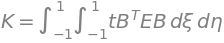

In [5]:
t, v, E = symbols("t nu E")
E_m = MatrixSymbol("E", 3, 3)
E_matrix = simplify((E/(1 - v**2)) * Matrix([[1, v,        0],
                                             [v, 1,        0],
                                             [0, 0, (1 -v)/2]]))
K = MatrixSymbol("K", 8, 8)
Eq(K, Integral(t * B.T * E_m * B, (qsi, -1, 1), (eta, -1, 1)), evaluate=False)

In [6]:
K_matrix = B.T * E_m * B
K_matrix = K_matrix.subs({E_m: E_matrix, B: B_matrix}).doit()

K_matrix = t * K_matrix

K_matrix

⎡       ⎛             2              2 ⎞                                      
⎢       ⎜    E⋅(η - 1)      E⋅(ξ - 1)  ⎟          ⎛  E⋅ν⋅(η - 1)⋅(ξ - 1)   E⋅(
⎢     t⋅⎜- ───────────── + ────────────⎟        t⋅⎜- ─────────────────── + ───
⎢       ⎜     2 ⎛ 2    ⎞      2        ⎟          ⎜        2 ⎛ 2    ⎞         
⎢       ⎝  4⋅l ⋅⎝ν  - 1⎠   8⋅l ⋅(ν + 1)⎠          ⎝     4⋅l ⋅⎝ν  - 1⎠         
⎢                                                                             
⎢                                                       ⎛          2          
⎢  ⎛  E⋅ν⋅(η - 1)⋅(ξ - 1)   E⋅(η - 1)⋅(ξ - 1)⎞          ⎜ E⋅(η - 1)       E⋅(ξ
⎢t⋅⎜- ─────────────────── + ─────────────────⎟        t⋅⎜──────────── - ──────
⎢  ⎜        2 ⎛ 2    ⎞            2          ⎟          ⎜   2              2 ⎛
⎢  ⎝     4⋅l ⋅⎝ν  - 1⎠         8⋅l ⋅(ν + 1)  ⎠          ⎝8⋅l ⋅(ν + 1)   4⋅l ⋅⎝
⎢                                                                             
⎢                                                   

In [7]:
K_matrix = K_matrix.integrate((qsi, -1, 1), (eta, -1, 1))

K_matrix = simplify(K_matrix)

K_matrix

⎡2⋅E⋅t⋅(ν - 3)     -E⋅t          -2⋅E⋅ν⋅t     E⋅t⋅(3⋅ν - 1)   E⋅t⋅(3 - ν)     
⎢─────────────  ────────────   ─────────────  ─────────────  ─────────────  ──
⎢   2 ⎛ 2    ⎞     2              2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2 ⎛ 2    ⎞    
⎢3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅(ν - 1)   3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅⎝ν  - 1⎠  3⋅l ⋅⎝ν  - 1⎠  2⋅
⎢                                                                             
⎢   -E⋅t        2⋅E⋅t⋅(ν - 3)  E⋅t⋅(1 - 3⋅ν)   E⋅t⋅(ν + 3)       E⋅t        -E
⎢────────────   ─────────────  ─────────────  ─────────────  ────────────   ──
⎢   2              2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2             
⎢2⋅l ⋅(ν - 1)   3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅⎝ν  - 1⎠  3⋅l ⋅⎝ν  - 1⎠  2⋅l ⋅(ν - 1)   3⋅
⎢                                                                             
⎢  -2⋅E⋅ν⋅t     E⋅t⋅(1 - 3⋅ν)  2⋅E⋅t⋅(ν - 3)      E⋅t         E⋅t⋅(ν + 3)   E⋅
⎢─────────────  ─────────────  ─────────────  ────────────   ─────────────  ──
⎢   2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2 ⎛ 2    ⎞     2  

In [10]:
Eq(K, MatMul(E*t/(l**2 * (v - 1)), simplify(K_matrix/((E*t)/(l**2 * (v - 1))))), evaluate=False)

               ⎡                                                           ν  
               ⎢                                                       1 - ─  
               ⎢ 2⋅(ν - 3)                   -2⋅ν        3⋅ν - 1           3  
               ⎢ ─────────      -1/2        ───────     ─────────      ─────  
               ⎢ 3⋅(ν + 1)                  3⋅ν + 3     2⋅(ν + 1)      ν + 1  
               ⎢                                                              
               ⎢                                                              
               ⎢                                                              
               ⎢              2⋅(ν - 3)   -(3⋅ν - 1)      ν + 3               
               ⎢   -1/2       ─────────   ───────────   ─────────       1/2   
               ⎢              3⋅(ν + 1)     2⋅ν + 2     3⋅(ν + 1)             
               ⎢                                                              
               ⎢                                    

In [9]:
import numpy as np

def elemento_de_membrana_quadrada(L, t_=0.01, v_=0.3, E_=210e9):
    return np.array(K_matrix.evalf(subs={l:L, t:t_, v:v_, E:E_}))

emq = elemento_de_membrana_quadrada

K_emq = emq(1)

K_emq

array([[4153846153.84615, 1500000000.00000, 461538461.538462,
        115384615.384615, -2076923076.92308, -1500000000.00000,
        -2538461538.46154, -115384615.384615],
       [1500000000.00000, 4153846153.84615, -115384615.384615,
        -2538461538.46154, -1500000000.00000, -2076923076.92308,
        115384615.384615, 461538461.538462],
       [461538461.538462, -115384615.384615, 4153846153.84615,
        -1500000000.00000, -2538461538.46154, 115384615.384615,
        -2076923076.92308, 1500000000.00000],
       [115384615.384615, -2538461538.46154, -1500000000.00000,
        4153846153.84615, -115384615.384615, 461538461.538462,
        1500000000.00000, -2076923076.92308],
       [-2076923076.92308, -1500000000.00000, -2538461538.46154,
        -115384615.384615, 4153846153.84615, 1500000000.00000,
        461538461.538462, 115384615.384615],
       [-1500000000.00000, -2076923076.92308, 115384615.384615,
        461538461.538462, 1500000000.00000, 4153846153.84615,
        -

Nó(0.0, 1.0) é o nó #1 da malha e #1 do elemento
Nó(0.5, 1.0) é o nó #2 da malha e #2 do elemento
Nó(0.0, 0.5) é o nó #6 da malha e #3 do elemento
Nó(0.5, 0.5) é o nó #7 da malha e #4 do elemento


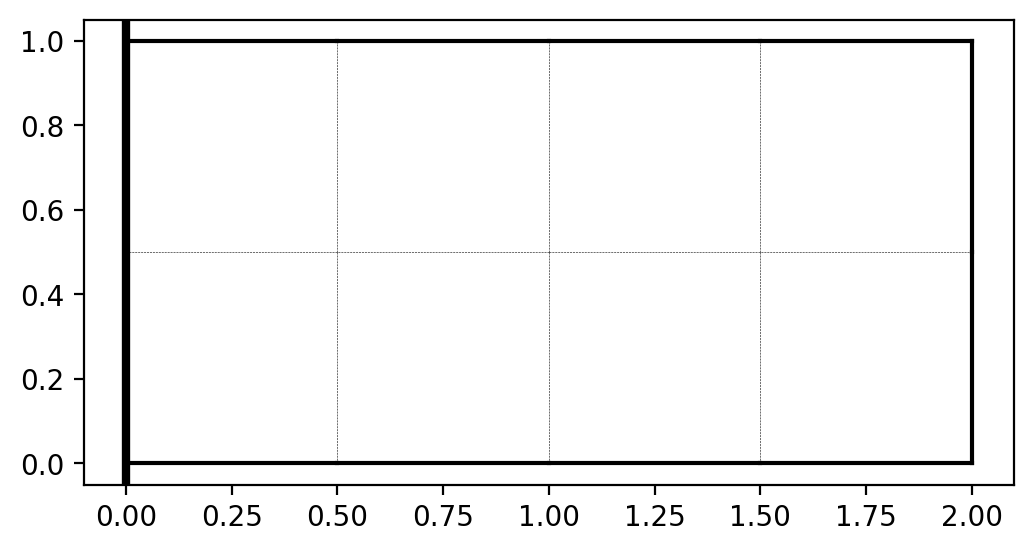

In [37]:
from matplotlib import pyplot as plt
from copy import copy

class Nó:

    def __init__(self, coordenadas):
        self.x, self.y = coordenadas
        
    def __gt__(self, other):
        if   self.y  > other.y:
            return True
        elif self.y == other.y:
            if self.x < other.x:
                return True
            else:
                return False
        else:
            return False
        
    def __eq__(self, other):
        (self.x, self.y) == (other.x, other.y)
    
    def __lt__(self, other):
        if self == other or self > other: return False
        else: return True
        
    def __str__(self):
        return ("Nó({}, {})".format(self.x, self.y))
    
    def __repr__(self):
        return ("Nó({}, {})".format(self.x, self.y))
    
    def __hash__(self):
        return hash((self.x, self.y))
    
class Elemento:

    def __init__(self, nós, tipo="Membrana Quadrada"):
        self.nós  = tuple(sorted(nós, reverse=True))
        self.tipo = tipo
        
        if tipo == "Membrana Quadrada":
            if len(nós) != 4:
                raise ValueError("A membrana quadrada é formada por 4 nós. "
                                 "{} foram fornecidos".format(len(nós)))
            self.l = nós[1].x - nós[0].x
        
        self.traçar_bordas()
            
    def traçar_bordas(self):
        if self.tipo == "Membrana Quadrada":
            self.bordas = []
            ks = [1, 3, 0, 2]
            for i, nó in enumerate(self.nós):
                k = ks[i]
                self.bordas.append((nó, self.nós[k]))
            self.bordas = tuple(self.bordas)
            
    def __str__(self):
        return self.__repr__()
        
    def __repr__(self):
        borda_superior = "{} — {}".format(self.nós[0], self.nós[1])
        borda_inferior = "{} — {}".format(self.nós[2], self.nós[3])
        meio = "|" + (max([len(borda_superior), len(borda_inferior)]) - 2)*" " + "|"
        return "\n".join([borda_superior, meio, borda_inferior])
                
    
class Malha:

    def __init__(self, elementos):
        self.elementos = elementos
        self.bordas_de_elementos = [borda for bordas in [e.bordas for e in elementos]
                                          for borda in bordas]
        self.bordas = []
        self.lados  = []
        
        lista_teste = copy(self.bordas_de_elementos)
        while len(lista_teste) > 0:
            lado = lista_teste.pop(0)
            conjugado = (lado[1], lado[0])
            
            if conjugado not in lista_teste:
                self.bordas.append(lado)
            else:
                lista_teste.remove(conjugado)
            self.lados.append(lado)
            
        self.nós = sorted(list(set([nó for nós in self.lados for nó in nós])), reverse=True)
    
    def plot(self, deslocamento=None, k=2):
        plt.rcParams['figure.dpi'] = 200
        
        if deslocamento is None: deslocamento = np.zeros(2*len(self.nós))
        
        for lado in self.lados:            
            i0 ,  i1 = self.índice_do_nó(lado[0]), self.índice_do_nó(lado[1])
            dx0, dx1 =         deslocamento[2*i0],         deslocamento[2*i1]
            dy0, dy1 =     deslocamento[2*i0 + 1],     deslocamento[2*i1 + 1]
            
            X  ,   Y = [lado[0].x + k*dx0, lado[1].x + k*dx1], [lado[0].y + k*dy0, lado[1].y + k*dy1]
            if lado in self.bordas:
                plt.plot(X, Y, "k-")
            else:
                plt.plot(X, Y, "k--", lw = 0.2)
                
        plt.axvline(x=0, c="black", lw="3")
        plt.axes().set_aspect("equal")
    
    def índice_do_nó(self, nó):
        return self.nós.index(nó)
                
def criar_malha(n, tipo="Placa em balanço 2 x 1"):
    l = 1/n
    nós = [[Nó((j*l, i*l)) for j in range(2*n + 1)]
                           for i in range(n, -1, -1)]
    
    elementos = []
    for i in range(n):
        for j in range(2*n):
            elementos.append(Elemento((nós[i][j], nós[i][j + 1], nós[i + 1][j + 1], nós[i + 1][j])))
    
    return Malha(elementos)

malha = criar_malha(2)

ele1 = malha.elementos[0]

for i, nó in enumerate(ele1.nós):
    print("{} é o nó #{} da malha e #{} do elemento".format(nó, malha.índice_do_nó(nó) + 1, i + 1))
    
malha.plot()

In [47]:
n = 20

lq    = 1/n
gsdl  = 2*(n + 1)*(2*n + 1)
malha = criar_malha(n)
Kes   = dict()

K_emq = elemento_de_membrana_quadrada(lq)

for elemento in malha.elementos:
    Ke = np.zeros((gsdl, gsdl))
    
    índices = np.array([
                [2*malha.índice_do_nó(n), 2*malha.índice_do_nó(n) + 1] for n in elemento.nós
                        ]).flatten()
    
    for ie in range(len(índices)):
        for je in range(len(índices)):
            i = índices[ie]
            j = índices[je]
            
            Ke[i][j] = K_emq[ie][je]
            
    Kes[elemento] = Ke
    
K = sum(Kes.values())

K.shape, K[:3, :3]

((1722, 1722),
 array([[ 1.66153846e+12,  6.00000000e+11,  1.84615385e+11],
        [ 6.00000000e+11,  1.66153846e+12, -4.61538462e+10],
        [ 1.84615385e+11, -4.61538462e+10,  3.32307692e+12]]))

In [48]:
from numpy.linalg import inv

P = 100e6
gdl_P = grau_de_liberdade_associado_a_P = (int((2*n + 1)*(n/2 + 1)) - 1)*2 + 1

f = np.zeros(gsdl)
u = np.zeros(gsdl)
u[:] = np.nan

#Condições de Contorno em u
for i in range(n + 1):
    i1 = 2*i*(2*n + 1)
    i2 = i1 + 1
    u[i1:(i2 + 1)] = 0
    f[i1:(i2 + 1)] = np.nan
    
#Condições de Contorno em f
f[gdl_P] = -P

ifc = índices_onde_f_é_conhecido = np.where(~np.isnan(f))[0]
iuc = índices_onde_u_é_conhecido = np.where(~np.isnan(u))[0]

Kfc = K[np.ix_(ifc, ifc)]
ufc = inv(Kfc) @ f[ifc].T

u[ifc] = ufc

f = K @ u.T

tolerância = 1e-5
f[abs(f) < tolerância] = 0

print(np.array_str(np.vstack([f, u]).T, precision=4))

[[ 3.0389e+00  0.0000e+00]
 [ 2.4998e+06  0.0000e+00]
 [ 0.0000e+00 -3.2756e-12]
 ...
 [ 0.0000e+00 -1.0511e-04]
 [ 0.0000e+00  8.4288e-07]
 [ 0.0000e+00 -1.0532e-04]]


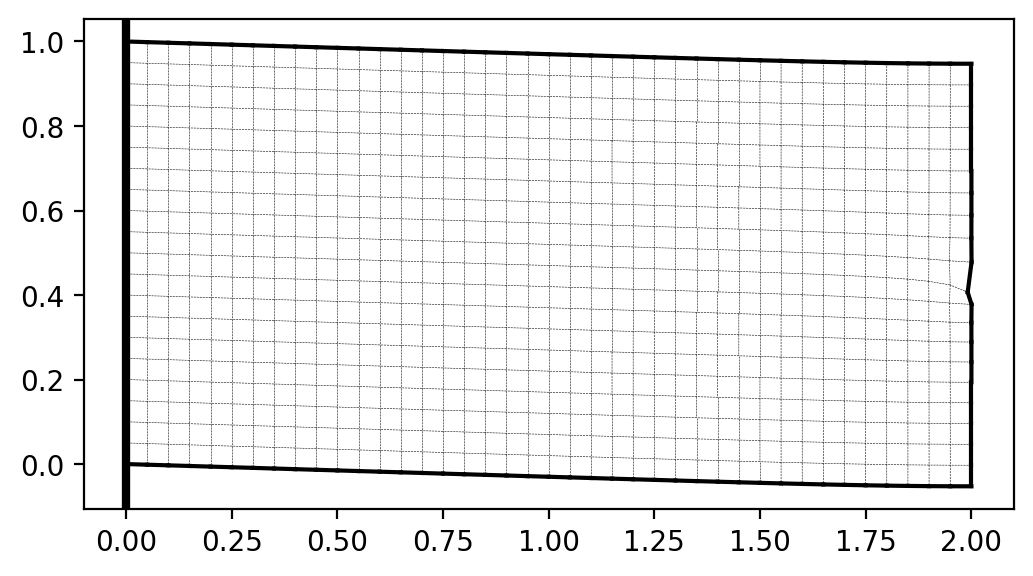

In [50]:
%matplotlib inline

malha.plot(u, 500)